### Measurement of interferometer with two phase shifters

In [1]:
import pocketvna
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
from stlab.devices.Vaunix_Phase import Vaunix_Phase
import time

Could not load "PocketVnaApi_x64" by systempath. Trying another one "C:\Users\Jacco\Documents\GitHub\bep-jacco-van-leenen\Code\PocketVnaApi_x64.dll"


### VNA

In [2]:
# Connecting the VNA
driver = pocketvna.Driver()

print('Driver is created: {} devices connected..'.format(driver.count()))
for i in range(0, driver.count()):
    print('Device {}'.format(i))
    print('\t {}'.format(driver.info_at(i)))

if not driver.connect_to(0):
    print('Failed to connect')

Driver is created: 1 devices connected..
Device 0
	 {'index': 0, 'path:': b'\\\\?\\hid#vid_03eb&pid_2402#7&1fc8f206&0&0000#{4d1e55b2-f16f-11cf-88cb-001111000030}', 'version': 512, 'SN': '', 'product': 'PocketVNA', 'vendor': 'Martin', 'read': True, 'write': True}


### Phase Shifters

In [3]:
# Connecting the phase shifters
ph1 = Vaunix_Phase(23869)
ph2 = Vaunix_Phase(19164)

# Setting the frequency to the minimum
ph1.SetFrequency(4000000000)
ph2.SetFrequency(4000000000)

# Setting the phase to the minimum
ph1.SetPhase(0)
ph2.SetPhase(0)

# Checking if the phases and the frequencies are set correctly
print("Phase of Phase Shifter 1: {}\nFrequency of Phase Shifter 1: {}".format(ph1.GetPhase(), ph1.GetFrequency()))
print("Phase of Phase Shifter 2: {}\nFrequency of Phase Shifter 2: {}".format(ph2.GetPhase(), ph2.GetFrequency()))

status: 0
status: 0
Phase of Phase Shifter 1: 0.0
Frequency of Phase Shifter 1: 4000000000.0
Phase of Phase Shifter 2: 0.0
Frequency of Phase Shifter 2: 4000000000.0


### Calibration Folder

In [6]:
# Setting the folder where the calibration data will be stored

# Main folder
calibration_folder_name = "Calibration_2"

# Checking if the folder exists. If it doesn't it will create the folder
if not os.path.exists(calibration_folder_name):
    os.mkdir(calibration_folder_name)

### Measurement Folder

In [7]:
# Setting the folder where the measurement data will be stored

# Main folder
measurement_folder_name = "Measurements_4"

# Checking if the folder exists. If it doesn't it will create the folder
if not os.path.exists(measurement_folder_name):
    os.mkdir(measurement_folder_name)

### Acquiring Calibration Data

In [ ]:
# Calibrating

# saving the data
def data_saving(s21, name):
    # 1000 steps per 1GHz
    file_name ="trans_{}_4-5GHz_101_steps_phase_shifter.dat".format(name)
    save_name = os.path.join("Calibration_2", file_name)
    data = np.column_stack((s21.real, s21.imag))
    np.savetxt(save_name, data)
    print("Saved: " + save_name)

#  ---------------Open and through measurement---------------
# 101 steps
steps = 101
# Start at 4_000_000_000 
start = 4000000000
# End at 5_000_000_000
end = 5000000000
# Average amount of measurements per point
average = 20

ph1.SetPhase(0)

# Frequency array
freq = np.linspace(start, end, steps, dtype=np.uint64)

#  ---------------Open Measurement---------------
# Measuring
input("Open Measurement")
s11, s21, s12, s22 = driver.scan(freq, average, pocketvna.NetworkParams.S21)

# Saving the data
data_saving(s21, "open")

#  ---------------through Measurement---------------
# Measuring
input("Through Measurement")
s11, s21, s12, s22 = driver.scan(freq, average, pocketvna.NetworkParams.S21)

# Saving the data
data_saving(s21, "through")

### Measuring

In [19]:
#### Measuring

#-----------------------------------Functions-----------------------------------
# Saving data
def data_saving(s21, name, steps, phase_shift_2):
    for deg_2 in phase_shift_2:
        
        file_name ="{}_{}_4-5GHz_{}_steps_real.dat".format(name, deg_2, steps)
        save_name = os.path.join("Measurements_4", file_name)
        np.savetxt(save_name, s21[:, :, deg_2].real)
        print("Saved: " + save_name)
        file_name ="{}_{}_4-5GHz_{}_steps_imag.dat".format(name, deg_2, steps)
        save_name = os.path.join("Measurements_4", file_name)
        np.savetxt(save_name, s21[:, :, deg_2].imag)
        print("Saved: " + save_name)
    
    
def calibrating_data(s21, steps):
    
    # Setting the file name of the calibration open calibration data
    file_name = "trans_open_4-5GHz_{}_steps.dat".format(steps)
    # Setting the path where the file can be found
    save_name = os.path.join("Calibration_2", file_name)
    # Load the data
    trans_open = np.loadtxt(save_name)
    # Get the data and put the real and imaginary part together again
    t_open = trans_open[:, 0] + trans_open[:, 1] * 1j

    # Setting the file name of the calibration open calibration data
    file_name = "trans_through_4-5GHz_{}_steps.dat".format(steps)
    # Setting the path where the file can be found
    save_name = os.path.join("Calibration_2", file_name)
    # Load the data
    trans_through = np.loadtxt(save_name)
    # Get the data and put the real and imaginary part together again
    t_through = trans_through[:, 0] + trans_through[:, 1] * 1j

    # Empty calibration array
    #cal_s21 = np.zeros(np.shape(s21), dtype=np.complex)
    
    return (s21 - t_open) / (t_through - t_open)

def calibrating_data_2(s21, steps):
    # Setting the file name of the calibration open calibration data
    file_name = "trans_open_4-5GHz_{}_steps_phase_shifter.dat".format(steps)
    # Setting the path where the file can be found
    save_name = os.path.join("Calibration_2", file_name)
    # Load the data
    trans_open = np.loadtxt(save_name)
    # Get the data and put the real and imaginary part together again
    t_open = trans_open[:, 0] + trans_open[:, 1] * 1j

    # Setting the file name of the calibration open calibration data
    file_name = "trans_through_4-5GHz_{}_steps_phase_shifter.dat".format(steps)
    # Setting the path where the file can be found
    save_name = os.path.join("Calibration_2", file_name)
    # Load the data
    trans_through = np.loadtxt(save_name)
    # Get the data and put the real and imaginary part together again
    t_through = trans_through[:, 0] + trans_through[:, 1] * 1j

    # Empty calibration array
    #cal_s21 = np.zeros(np.shape(s21), dtype=np.complex)
    
    return (s21 - t_open) / (t_through - t_open)

    

#  -----------------------------------Variables--------------------------------------
# Amount of steps to measure
steps = 1001
# Start at 4_000_000_000 
start = 4000000000
# End at 5_000_000_000
end = 5000000000
# Average amount of measurements per point
average = 10

# name to be given to the data
name = "interferometer_2_phase_shifters"
# name = "michelson_interferometer_1_phase_shifter"
# name = "Through_1_phase_shifter"

# Specify the phase of the phase shifters
ph1_step_size = 45
ph2_step_size = 45
ph1_start = 0
ph2_start = 0
ph1_end = 360
ph2_end = 1
phase_shift_1 = []
phase_shift_2 = []

for i in range(ph1_start, ph1_end + 1, ph1_step_size):
    phase_shift_1.append(i)
for i in range(ph2_start, ph2_end + 1, ph2_step_size):
    phase_shift_2.append(i)

# Frequency array
freq = np.linspace(start, end, steps, dtype=np.uint64)

# Empty S21 array and calibration array
s21 = np.zeros((steps, len(phase_shift_1), len(phase_shift_2)), dtype=np.complex)
cal_s21 = np.zeros((steps, len(phase_shift_1), len(phase_shift_2)), dtype=np.complex)
cal_s21_2 = np.zeros((steps, len(phase_shift_1), len(phase_shift_2)), dtype=np.complex)


#  ----------------------------------Measuring--------------------------------------
for deg_1 in range(len(phase_shift_1)):

    # Setting the phase of the phase shifter
    ph1.SetPhase(phase_shift_1[deg_1])
    
    # Next for loop for next Phase Shifter
    for deg_2 in range(len(phase_shift_2)):
        
        # Setting the phase of the second phase shifter
        ph2.SetPhase(phase_shift_1[deg_2])
        
        print("\tAcquiring data\nPhase Shifter 1: {} degrees \t Phase Shifter 2: {} degrees".format(phase_shift_1[deg_1], phase_shift_1[deg_2]))
        
        # For the response time of the phase shifter
        time.sleep(0.1)

        # The Measurement
        s11, s21[:, deg_1, deg_2], s12, s22 = driver.scan(freq, average, pocketvna.NetworkParams.S21)
        
        # Calibrating the data
        cal_s21[:, deg_1, deg_2] = calibrating_data(s21[:, deg_1, deg_2], steps)
        
        # Calibrating the data the other way
        cal_s21_2[:, deg_1, deg_2] = calibrating_data_2(s21[:, deg_1, deg_2], steps)

# -----------------------------------Data Saving-------------------------------
data_saving(s21, name, steps, phase_shift_2)
data_saving(cal_s21, name + "_cal", steps, phase_shift_2)
data_saving(cal_s21_2, name + "_cal_2", steps, phase_shift_2)

	Acquiring data
Phase Shifter 1: 0 degrees 	 Phase Shifter 2: 0 degrees
	Acquiring data
Phase Shifter 1: 45 degrees 	 Phase Shifter 2: 0 degrees
	Acquiring data
Phase Shifter 1: 90 degrees 	 Phase Shifter 2: 0 degrees
	Acquiring data
Phase Shifter 1: 135 degrees 	 Phase Shifter 2: 0 degrees
	Acquiring data
Phase Shifter 1: 180 degrees 	 Phase Shifter 2: 0 degrees
	Acquiring data
Phase Shifter 1: 225 degrees 	 Phase Shifter 2: 0 degrees
	Acquiring data
Phase Shifter 1: 270 degrees 	 Phase Shifter 2: 0 degrees
	Acquiring data
Phase Shifter 1: 315 degrees 	 Phase Shifter 2: 0 degrees
	Acquiring data
Phase Shifter 1: 360 degrees 	 Phase Shifter 2: 0 degrees
Saved: Measurements_4\interferometer_2_phase_shifters_0_4-5GHz_1001_steps_real.dat
Saved: Measurements_4\interferometer_2_phase_shifters_0_4-5GHz_1001_steps_imag.dat
Saved: Measurements_4\interferometer_2_phase_shifters_cal_0_4-5GHz_1001_steps_real.dat
Saved: Measurements_4\interferometer_2_phase_shifters_cal_0_4-5GHz_1001_steps_imag.da

### Plotting

In [10]:
# Plotting the measurements

def opening_files(name, phase_shift_1, phase_shift_2, steps):
    
    # We don't need much of the data so we pick the specific columns
    # Empty array
    s21_new = np.zeros((steps, len(phase_shift_1)), dtype=np.complex)
    
    for i in range(len(phase_shift_2)):
        
        
        # Getting the uncalibrated data and putting it together
        file_name = "{}_{}_4-5GHz_{}_steps_real.dat".format(name, phase_shift_2[i], steps)
        save_name = os.path.join("Measurements_2", file_name)
        s21_real = np.loadtxt(save_name)
        file_name = "{}_{}_4-5GHz_{}_steps_imag.dat".format(name, phase_shift_2[i], steps)
        save_name = os.path.join("Measurements_2", file_name)
        s21_imag = np.loadtxt(save_name)
        s21 = s21_real + s21_imag * 1j

        # Putting columns of one array in the other
        s21_new[:, i] = s21[:, i]

    return s21_new

def get_labels(phase_shift_1, phase_shift_2, degree_sign):
    labels = []
    for i in range(len(phase_shift_2)):
        labels.append("$\phi_1 = ${}{}, $\phi_2 = ${}{}".format(phase_shift_1[i], degree_sign, phase_shift_2[i], degree_sign))
    return labels

def plot_amplitude(s21, labels, name, steps):
    # Set the frequency array
    freq = np.linspace(4, 5, steps)
    
    # Setting an empty frequency array
    f = np.zeros((steps, len(labels)))
    
    # filling the frequency array to the same size as s21
    f = f + freq[:, None]
    
    # Getting the amplitude from the complex data
    amp_s21 = np.sqrt(s21.real**2 + s21.imag**2)
    
    # Setting the amplitude in dB
    amp_s21 = 20*np.log10(amp_s21)
    
    # Plotting
    plt.figure(name)
    plt.plot(f, amp_s21, "-")
    plt.xlabel("frequency (GHz)")
    plt.ylabel("amplitude (dB)")
    plt.legend(labels, title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.title(name)
    
def plot_phase(s21, labels):
    # Set the frequency array
    freq = np.linspace(4, 5, 101)
    
    # Setting an empty frequency array
    f = np.zeros((101, len(labels)))
    
    # filling the frequency array to the same size as s21
    f = f + freq[:, None]
    
    # Setting the phase from the complex data
    phase = np.arctan2(s21.imag, s21.real)
    phase -= phase[:, 0, None]
    
    # Phase from radians to degrees
    phase = phase * 180/np.pi
    phase[phase< -180] += 360
    phase[phase > 180] -= 360
    
    # Plotting
    plt.figure(name+"phase")
    plt.plot(f, phase, ".")
    plt.xlabel("frequency (GHz)")
    plt.ylabel("phase (degrees)")
    plt.legend(labels)
    plt.grid()
    plt.title(name + " Phase")
    
# Opening the measurement data file
# name = "Through_1_phase_shifter"
# name = "michelson_interferometer_1_phase_shifter"
# name = "interferometer"
name = "interferometer_2_phase_shifters"
start = 4
end = 5
steps = 1001
phase_shift_1 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
phase_shift_2 = [0, 45, 90, 135, 180, 225, 270, 315, 360]

degree_sign = u'\N{DEGREE SIGN}'

# Setting the figure size of the plots
plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['figure.dpi'] = 300


# ---------------Opening Measurement Files---------------
# s21 = opening_files(name, phase_shift_1, phase_shift_2, steps)
cal_s21 = opening_files(name + "_cal", phase_shift_1, phase_shift_2, steps)
cal_s21_2 = opening_files(name + "_cal_2", phase_shift_1, phase_shift_2, steps)

# ---------------Plotting Amplitude---------------
# Making labels
labels = get_labels(phase_shift_1, phase_shift_2, degree_sign)

# plot_amplitude(s21, labels, name)
plot_amplitude(cal_s21, labels, name + " calibrated", steps)
plot_amplitude(cal_s21_2, labels, name + " calibrated 2", steps)

# ---------------Plotting Phase-----------------
#plot_phase(cal_s21, labels)

OSError: Measurements_2\interferometer_2_phase_shifters_cal_45_4-5GHz_1001_steps_real.dat not found.

In [ ]:
min_amp = 1
max_amp = 0

for i in range(361):
    
    for j in range(361):
        

In [23]:
for i in range(0, 10, 2):
    print(i)

0
2
4
6
8


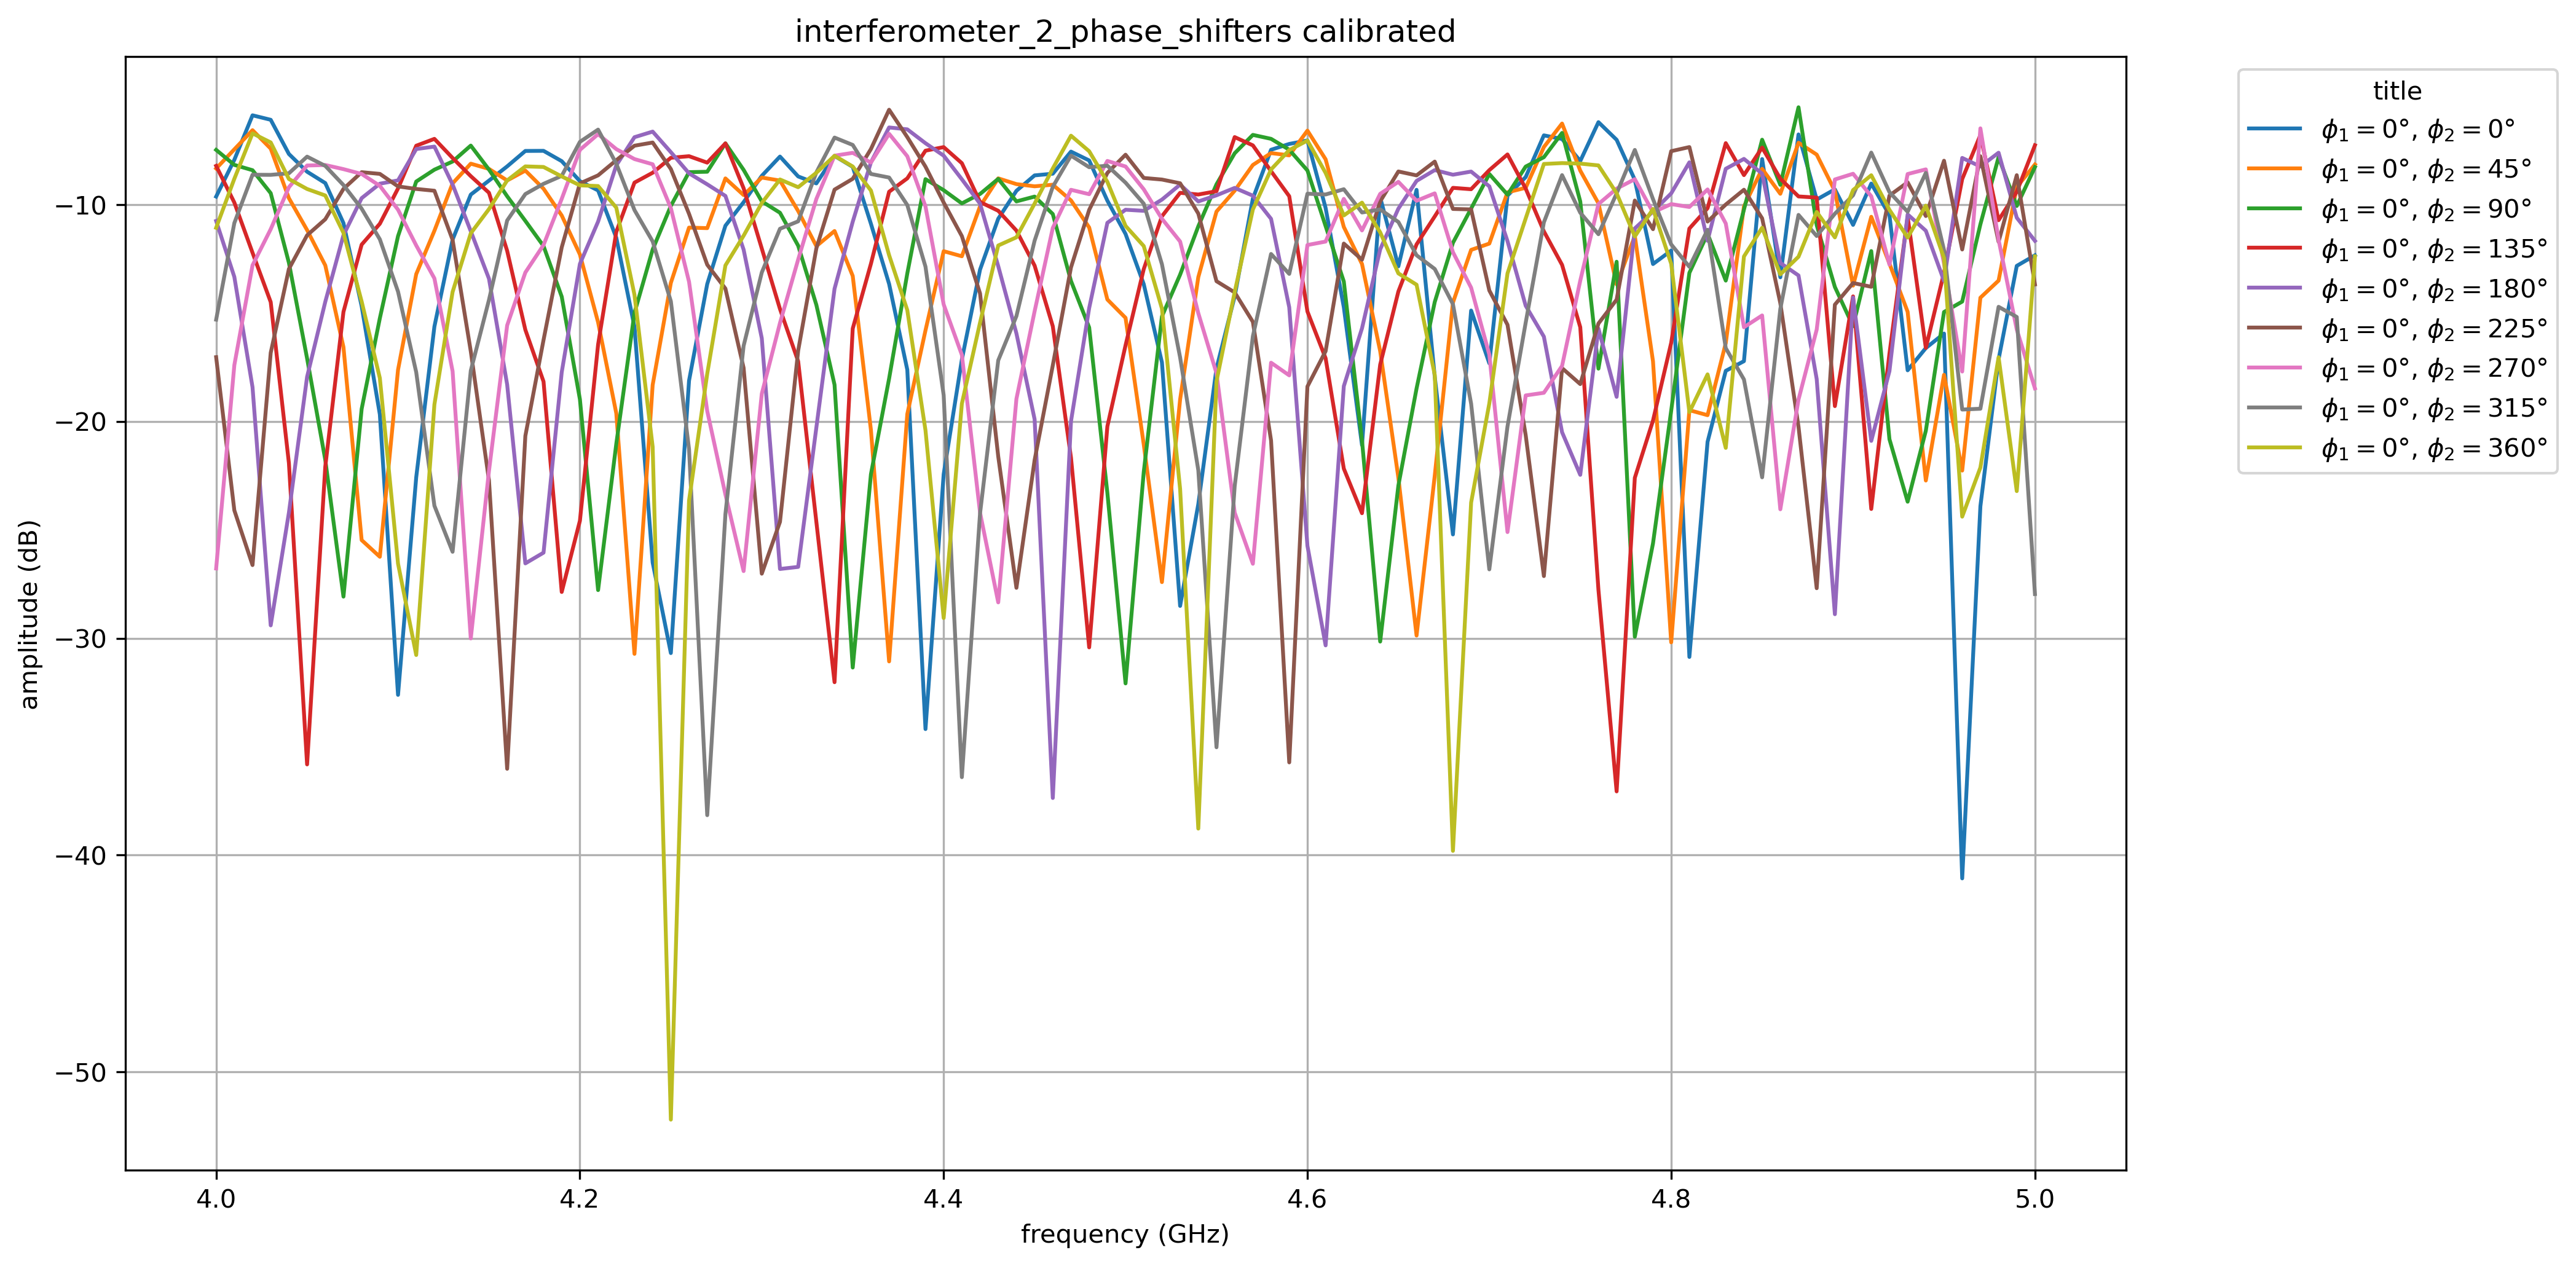

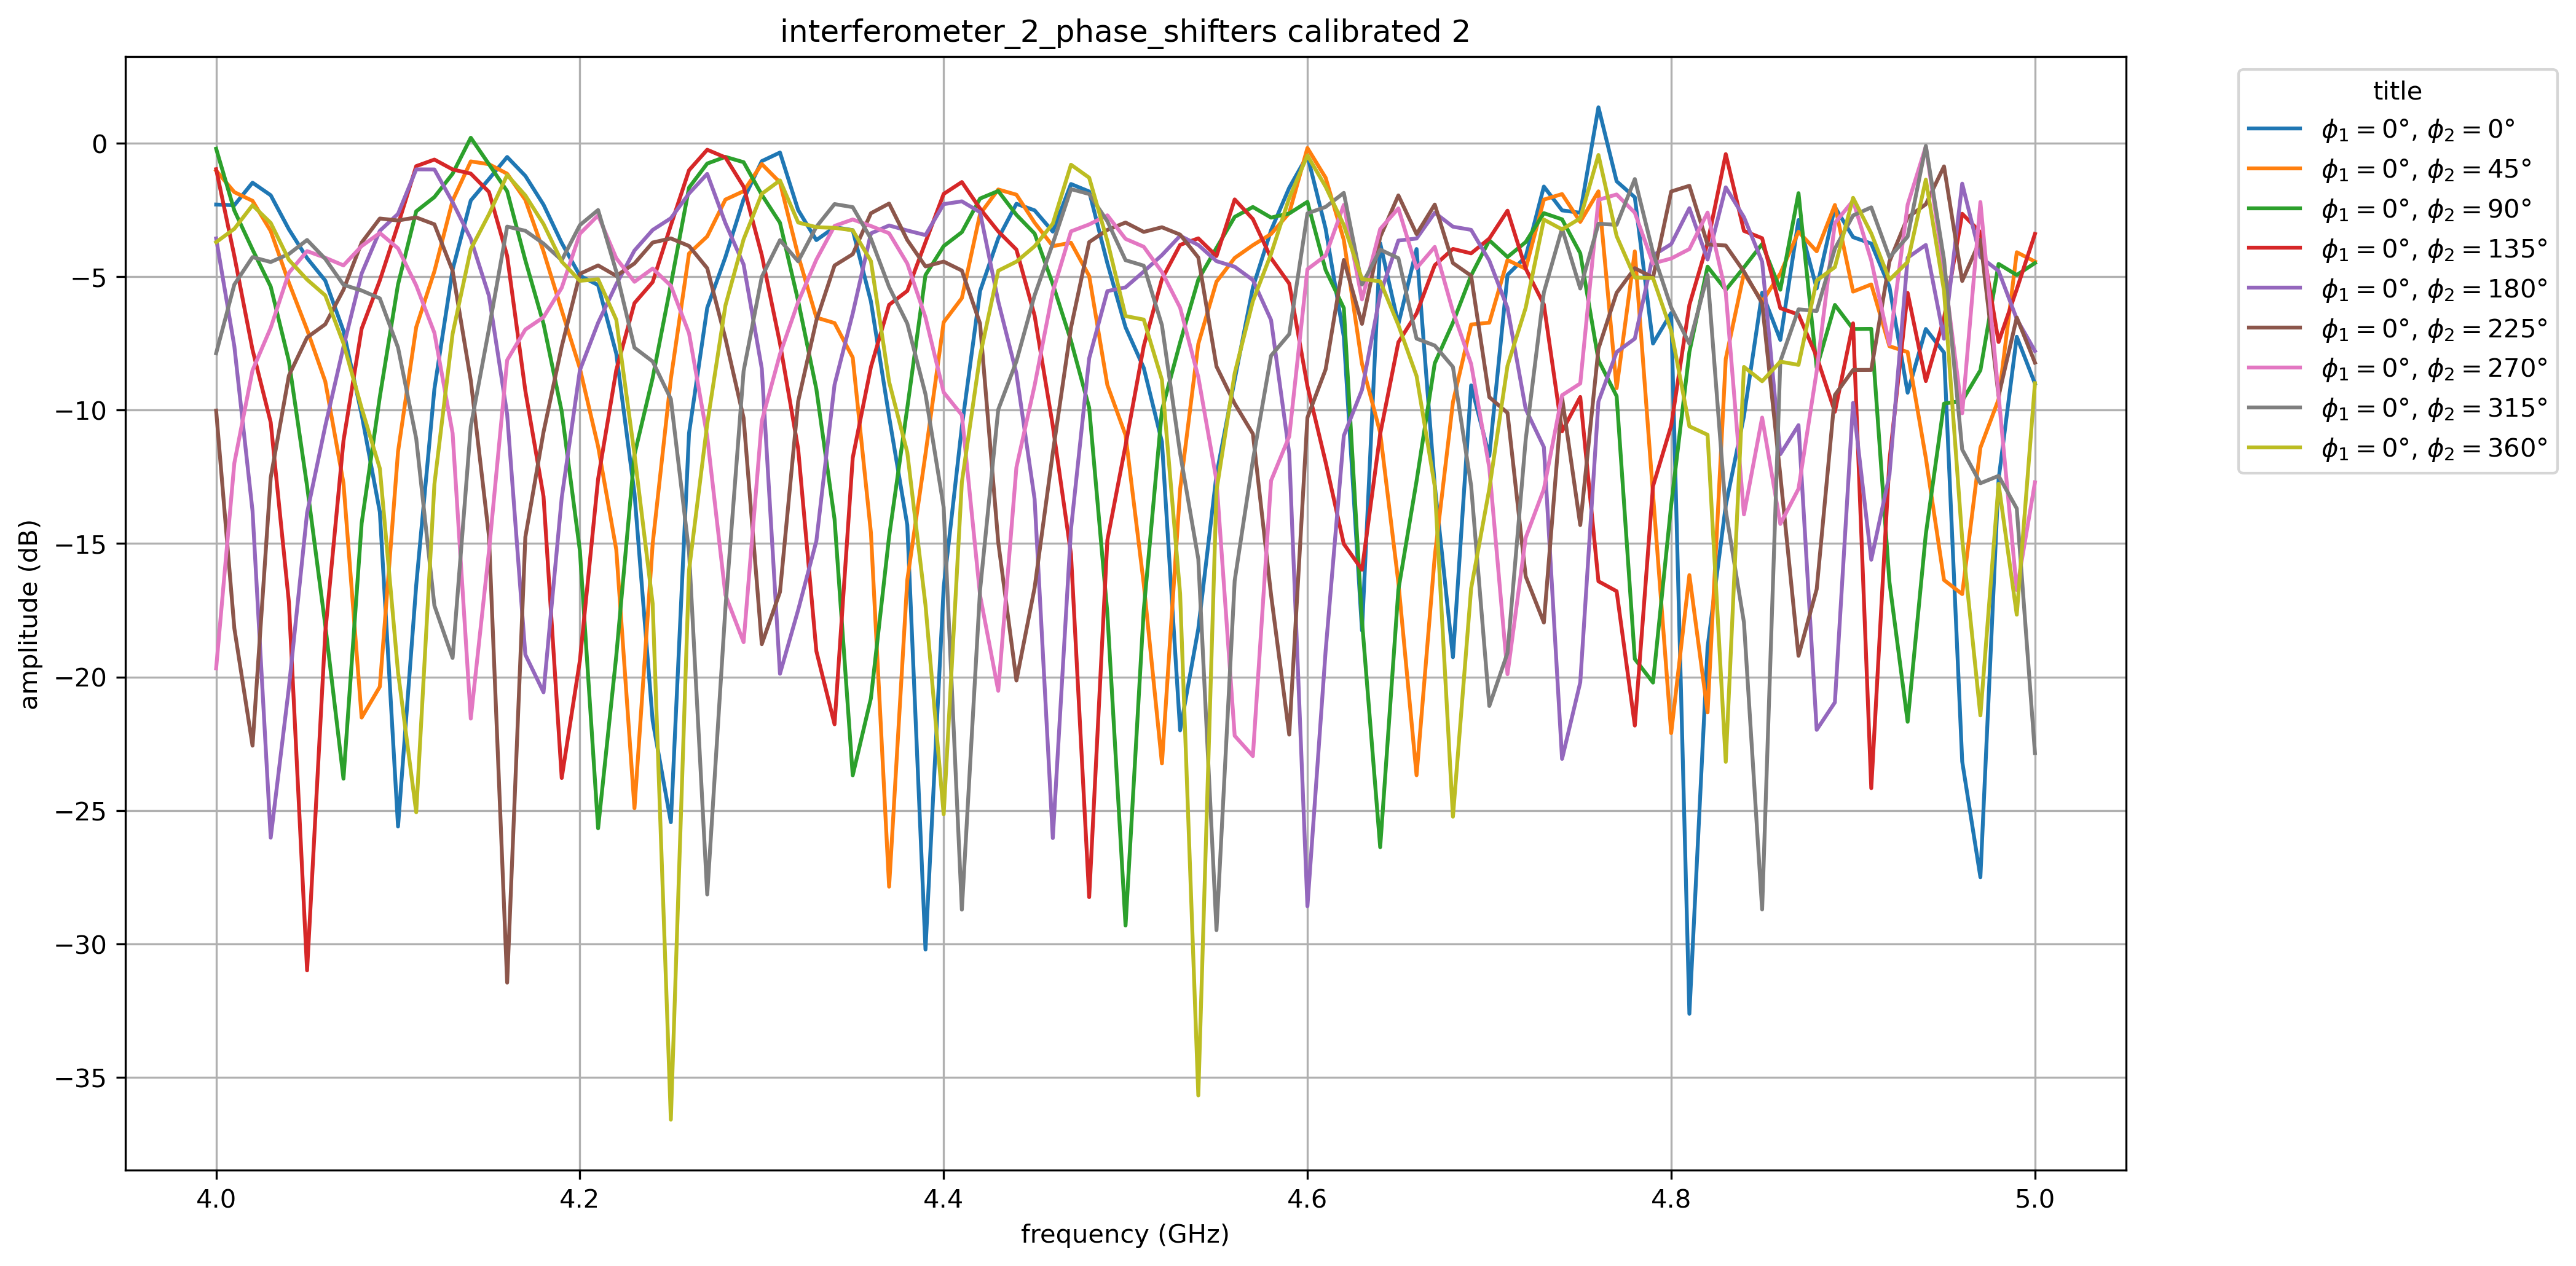

In [9]:
# Plotting the measurements

def opening_files(name, phase_shift_1, phase_shift_2, steps, extra):
    
    # We don't need much of the data so we pick the specific columns
    # Empty array
    s21_new = np.zeros((steps, len(phase_shift_1)), dtype=np.complex)
    
    for i in range(len(phase_shift_2)):
        
        
        # Getting the uncalibrated data and putting it together
        file_name = "{}_{}_{}_4-5GHz_{}_steps_real.dat".format(name, phase_shift_2[i], extra, steps)
        save_name = os.path.join("Measurements_2", file_name)
        s21_real = np.loadtxt(save_name)
        file_name = "{}_{}_{}_4-5GHz_{}_steps_imag.dat".format(name, phase_shift_2[i], extra, steps)
        save_name = os.path.join("Measurements_2", file_name)
        s21_imag = np.loadtxt(save_name)
        s21 = s21_real + s21_imag * 1j

        # Putting columns of one array in the other
        s21_new[:, i] = s21[:, i]

    return s21_new

def get_labels(phase_shift_1, phase_shift_2, degree_sign):
    labels = []
    for i in range(len(phase_shift_2)):
        labels.append("$\phi_1 = ${}{}, $\phi_2 = ${}{}".format(phase_shift_1[i], degree_sign, phase_shift_2[i], degree_sign))
    return labels

def plot_amplitude(s21, labels, name, steps):
    # Set the frequency array
    freq = np.linspace(4, 5, steps)
    
    # Setting an empty frequency array
    f = np.zeros((steps, len(labels)))
    
    # filling the frequency array to the same size as s21
    f = f + freq[:, None]
    
    # Getting the amplitude from the complex data
    amp_s21 = np.sqrt(s21.real**2 + s21.imag**2)
    
    # Setting the amplitude in dB
    amp_s21 = 20*np.log10(amp_s21)
    
    # Plotting
    plt.figure(name)
    plt.plot(f, amp_s21, "-")
    plt.xlabel("frequency (GHz)")
    plt.ylabel("amplitude (dB)")
    plt.legend(labels, title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.title(name)
    
def plot_phase(s21, labels):
    # Set the frequency array
    freq = np.linspace(4, 5, 101)
    
    # Setting an empty frequency array
    f = np.zeros((101, len(labels)))
    
    # filling the frequency array to the same size as s21
    f = f + freq[:, None]
    
    # Setting the phase from the complex data
    phase = np.arctan2(s21.imag, s21.real)
    phase -= phase[:, 0, None]
    
    # Phase from radians to degrees
    phase = phase * 180/np.pi
    phase[phase< -180] += 360
    phase[phase > 180] -= 360
    
    # Plotting
    plt.figure(name+"phase")
    plt.plot(f, phase, ".")
    plt.xlabel("frequency (GHz)")
    plt.ylabel("phase (degrees)")
    plt.legend(labels)
    plt.grid()
    plt.title(name + " Phase")
    
# Opening the measurement data file
# name = "Through_1_phase_shifter"
# name = "michelson_interferometer_1_phase_shifter"
# name = "interferometer"
name = "interferometer_2_phase_shifters"
start = 4
end = 5
steps = 101
phase_shift_1 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
phase_shift_2 = [0, 45, 90, 135, 180, 225, 270, 315, 360]

degree_sign = u'\N{DEGREE SIGN}'

# Setting the figure size of the plots
plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['figure.dpi'] = 300


# ---------------Opening Measurement Files---------------
# s21 = opening_files(name, phase_shift_1, phase_shift_2, steps)
cal_s21 = opening_files(name, phase_shift_1, phase_shift_2, steps, "cal")
cal_s21_2 = opening_files(name, phase_shift_1, phase_shift_2, steps, "cal_2")

# ---------------Plotting Amplitude---------------
# Making labels
labels = get_labels(phase_shift_1, phase_shift_2, degree_sign)

# plot_amplitude(s21, labels, name)
plot_amplitude(cal_s21, labels, name + " calibrated", steps)
plot_amplitude(cal_s21_2, labels, name + " calibrated 2", steps)

# ---------------Plotting Phase-----------------
#plot_phase(cal_s21, labels)